# Topic

#### Background

#### Project Goal

#### Story of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Import and Understand Data

In [2]:
df=pd.read_csv('.csv')

In [ ]:
#df=pd.concat([train,test]).reset_index(drop=True)

In [3]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [4]:
df.shape

(2544, 16)

In [5]:
df.dtypes

id                               int64
pathrise_status                 object
primary_track                   object
cohort_tag                      object
program_duration_days          float64
placed                           int64
employment_status               object
highest_level_of_education      object
length_of_job_search            object
biggest_challenge_in_search     object
professional_experience         object
work_authorization_status       object
number_of_interviews           float64
number_of_applications           int64
gender                          object
race                            object
dtype: object

### 2. Explore Data (EDA)

- 2.1 Data Quality Check
    - check missing values
    - check duplicates
    - check distribution
- 2.2 Group Obj/num Features
- 2.3 Data Exploration
    - Obj:
        * a) Demographic: 
        * b) Personal background: 
        * c) Job search: 
        * d) Time series: 
    - Num: 
        * a) Program: 
        * b) Job search:

### 2.1 Data Quality Check

#### Check missing values

In [6]:
df.isna().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

#### impute missing values

In [7]:
df.loc[df.program_duration_days.isna(),'program_duration_days'] = 0

In [8]:
interviews_median = df.loc[df.number_of_interviews > 0, 'number_of_interviews'].median()
df.loc[df.number_of_interviews.isna(),'number_of_interviews'] = interviews_median

In [9]:
df.loc[df['employment_status '].isna(),'employment_status '] = 'Unemployed'
df.loc[df['work_authorization_status'].isna(),'work_authorization_status'] = 'Other'
df.loc[df['gender'].isna(),'gender'] = 'Decline to Self Identify'
df.loc[df['race'].isna(),'race'] = 'Decline to Self Identify'

In [10]:
df=df.loc[df.cohort_tag.notnull()&df.highest_level_of_education.notnull()&df.biggest_challenge_in_search.notnull()]

In [11]:
df.isna().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       0
program_duration_days            0
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search            69
biggest_challenge_in_search      0
professional_experience        212
work_authorization_status        0
number_of_interviews             0
number_of_applications           0
gender                           0
race                             0
dtype: int64

#### Check duplicates

In [12]:
df.duplicated().sum()

0

#### Check distribution

In [13]:
df.placed.value_counts()

0    1531
1     923
Name: placed, dtype: int64

In [14]:
df.placed.value_counts(normalize=True)

0    0.623879
1    0.376121
Name: placed, dtype: float64

In [15]:
df.pathrise_status.value_counts()

Placed                923
Active                512
Withdrawn             383
Withdrawn (Trial)     269
Closed Lost           173
Withdrawn (Failed)     80
MIA                    50
Deferred               32
Break                  32
Name: pathrise_status, dtype: int64

In [16]:
df.pathrise_status.value_counts(normalize=True)

Placed                0.376121
Active                0.208639
Withdrawn             0.156072
Withdrawn (Trial)     0.109617
Closed Lost           0.070497
Withdrawn (Failed)    0.032600
MIA                   0.020375
Deferred              0.013040
Break                 0.013040
Name: pathrise_status, dtype: float64

### 2.2 Group obj/num Features

In [17]:
cols=df.columns.values
cols

array(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'], dtype=object)

In [18]:
num_var=list(df.select_dtypes(include=np.number))
print (len(num_var))
num_var

5


['id',
 'program_duration_days',
 'placed',
 'number_of_interviews',
 'number_of_applications']

In [19]:
obj_var=list(df.select_dtypes(include=np.object))
print(len(obj_var))
obj_var

11


['pathrise_status',
 'primary_track',
 'cohort_tag',
 'employment_status ',
 'highest_level_of_education',
 'length_of_job_search',
 'biggest_challenge_in_search',
 'professional_experience',
 'work_authorization_status',
 'gender',
 'race']

### 2.3 Data Exploration

### 2.3.1 Obj Features

#### a) Demographic

In [20]:
i=9
print('Category:',i,',',obj_var[i],'\n',
     'Missing Values:',df[obj_var[i]].isna().sum())
df[obj_var[i]].value_counts()
# 20% gender data missing

Category: 9 , gender 
 Missing Values: 0


Male                        1440
Female                       522
Decline to Self Identify     486
Non-Binary                     6
Name: gender, dtype: int64

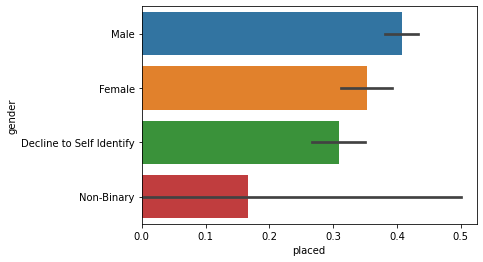

In [21]:
sns.barplot(y=df[obj_var[i]],x='placed',data=df)
#male candidates have higher chances to be placed.

#### b) Personal background

#### c) Job search

#### d) Time series - market volatility

In [38]:
df.cohort_tag.unique()

array(['OCT19A', 'JAN20A', 'AUG19B', 'AUG19A', 'SEP19A', 'AUG19C',
       'DEC19A', 'FEB20A', 'NOV19A', 'NOV19B', 'JAN20B', 'FEB20B',
       'JUL19B', 'APR20A', 'OCT18A', 'SEP18C', 'OCT18B', 'JAN19A',
       'MAR19A', 'FEB19A', 'FEB19B', 'APR19A', 'AUG18A', 'DEC18A',
       'MAR19B', 'JAN19B', 'JUN19B', 'SEP18B', 'NOV18A', 'SEP18A',
       'APR19B', 'MAY19A', 'JUL19A', 'JUN19A', 'FEB18A', 'JUN18A',
       'MAR18A', 'APR18A', 'APR18B', 'MAY18A', 'OCT21A', 'SEP19B',
       'MAR20A', 'MAY19B', 'FEB20a', 'OCT19B', 'JAN18A'], dtype=object)

In [39]:
df['cohort_year']=df.cohort_tag.apply(lambda x: int(x[3:5]))
df.cohort_year.unique()
#error data: 2021, check.

array([19, 20, 18, 21])

In [40]:
df=df.loc[df.cohort_year<21]
df.shape

(2452, 17)

In [41]:
df.cohort_year.value_counts()

19    1380
18     720
20     352
Name: cohort_year, dtype: int64

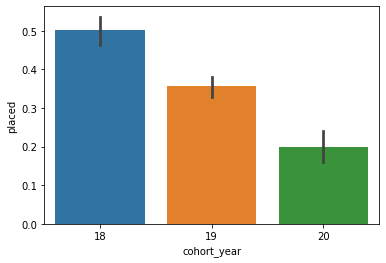

In [42]:
sns.barplot(x=df.cohort_year,y='placed',data=df)
# students enrolled in Apr, Mar, May, and Oct has higher placement chances than the rest.

In [43]:
df.cohort_tag.head()

0    OCT19A
1    JAN20A
2    AUG19B
3    AUG19B
4    AUG19A
Name: cohort_tag, dtype: object

In [44]:
df.cohort_tag[1][3:5]

'20'

In [45]:
df['cohort_month']=df.cohort_tag.apply(lambda x: str(x[:3]))
df.cohort_month.unique()

array(['OCT', 'JAN', 'AUG', 'SEP', 'DEC', 'FEB', 'NOV', 'JUL', 'APR',
       'MAR', 'JUN', 'MAY'], dtype=object)

In [46]:
df.cohort_month.value_counts()

JAN    410
OCT    283
FEB    269
SEP    269
AUG    268
DEC    177
NOV    157
MAR    156
JUN    155
APR    138
JUL    105
MAY     65
Name: cohort_month, dtype: int64

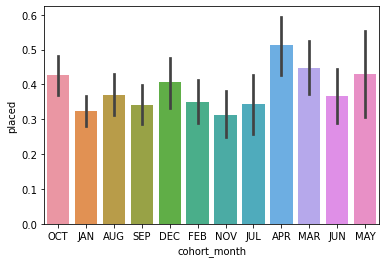

In [47]:
sns.barplot(x=df.cohort_month,y='placed',data=df)
# the placement rate is decling over the years since 2018-2020
# check error data: 2021.

In [48]:
df['cohort_week']=df.cohort_tag.apply(lambda x: str(x[-1]))
df.cohort_week.unique()
#combine A/a.

array(['A', 'B', 'C', 'a'], dtype=object)

In [49]:
df.cohort_week.value_counts()

A    1504
B     810
C     134
a       4
Name: cohort_week, dtype: int64

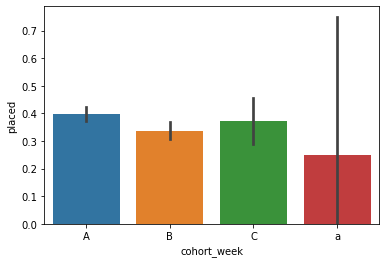

In [50]:
sns.barplot(x=df.cohort_week,y='placed',data=df)
# more people enrolled in the first week of each month.
# align with common sense, no distince placement rate difference among weeks.
# combine A, a.

In [51]:
obj_feature.remove('cohort_tag')
num_feature.append('cohort_year')
obj_feature.append('cohort_week')
obj_feature.append('cohort_month')

In [52]:
df=df.drop('cohort_tag',axis=1)
df.head()

,id,pathrise_status,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cohort_year,cohort_month,cohort_week
0,1,Active,SWE,0.0,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American,19,OCT,A
1,2,Active,PSO,0.0,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American,20,JAN,A
2,3,Closed Lost,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,19,AUG,B
3,4,Closed Lost,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,19,AUG,B
4,5,Placed,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,19,AUG,A


In [53]:
obj_feature.remove('pathrise_status')

In [54]:
len(obj_var)

11

IndexError: list index out of range

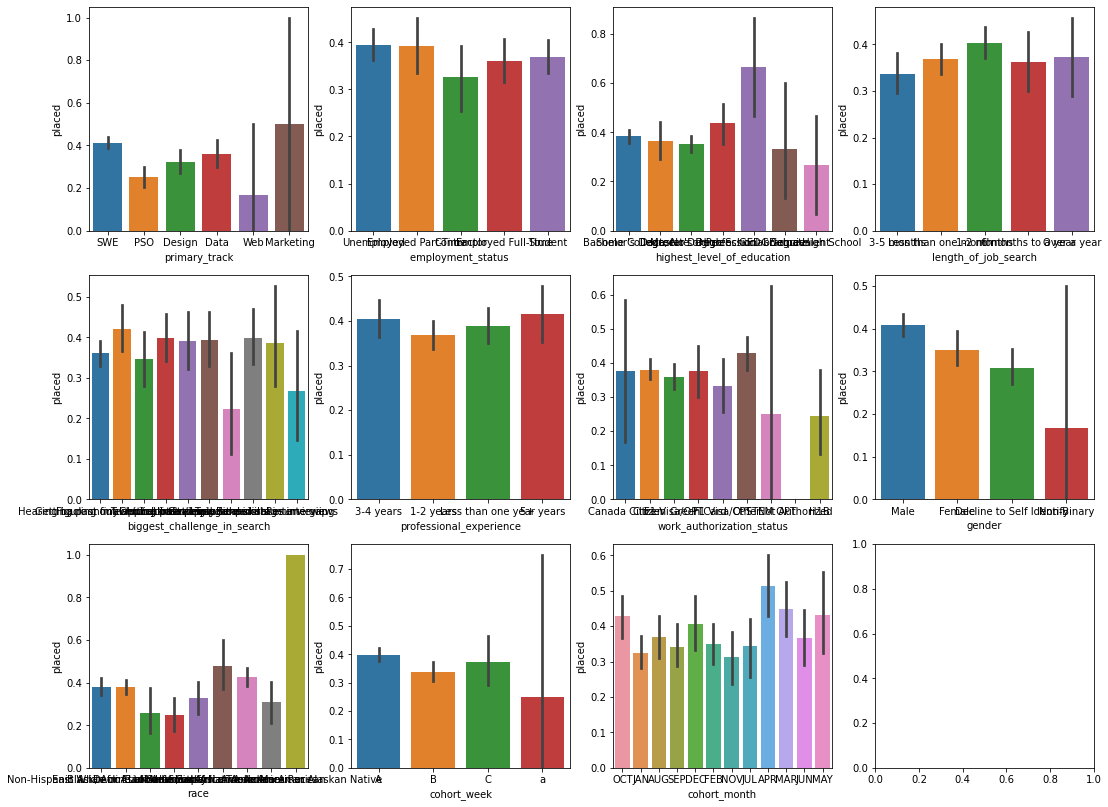

In [70]:
# obj_var 116=4*29
fig,axes = plt.subplots(29,4,figsize=(18,100))

i=0
m=0
for i in range(len(obj_var)):
    while m<29:
        n=0
        while n<4:
            sns.barplot(ax=axes[m, n], data=train, x=obj_var[i], y='loss',
                        order=np.sort(train[obj_var[i]].unique()))
            i=i+1
            n=n+1
        m=m+1

### 2.3.2 Num Features

In [ ]:
num_var

In [ ]:
num_var.remove('id')
num_var.remove('placed')

In [ ]:
corr=df[num_var].corr()
corr

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10})
# program duration days vs placed rate is somewhat nagative related.
# staying longer in the program doesnt necessarily indicate high chances to find a job.
# no feature highly correlated with the target "placed"

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,8))
count=1
for i in range(len(num_var)):
    plt.subplot(len(num_var)/2,2,count)
    #plt.hist(df[num_feature[i]],bins=10)
    plt.violinplot(df[num_var[i]],showmeans=True)
    plt.title(num_var[i])
    count+=1

In [ ]:
# most candidates with programs within one year.
# the placment rate has no obvious relations with # of applications/interviews.

### 3. Feature Engineering

Select rows: - Closed Lost/Deferred/Break
- 3.1 Label Encoding
    * a) cohort_month/week
    * b) professional_experience
    * c) length_of_job_search
- 3.2 One hot encoding: 
    * primary_track,highest_level_of_education,biggest_challenge_in_search,
    * race,gender,work_authorization_status,employment_status
- 3.3 Skewness and standardlization (Num_feature)
    * skewness
    * standard scaling

In [ ]:
print (len(num_feature))
num_feature

In [ ]:
num_feature=list(set(num_feature)-set(['id','placed']))
sorted(num_feature)

In [ ]:
obj_feature=list(set(obj_feature)-set(['pathrise_status']))
print (len(obj_feature))
print(sorted(obj_feature))

In [ ]:
all_feature=obj_feature+num_feature+['id','pathrise_status','placed']
df=df[all_feature]
df.head()

#### Select rows: - Closed Lost/Deferred/Break

In [ ]:
df.pathrise_status.value_counts()

In [ ]:
status_list=list(df.pathrise_status.unique())
status_list

In [ ]:
status_list.remove('Closed Lost')
status_list.remove('Deferred')
status_list.remove('Break')
status_list

In [ ]:
df=df[df.pathrise_status.isin(status_list)]

In [ ]:
print('df shape is: ', df.shape)

In [ ]:
df.head()

### Label encoding

In [ ]:
from sklearn import preprocessing

In [ ]:
LBL=preprocessing.LabelEncoder()
LE_map=dict{}
for i in obj_var:
    df[i]=LBL.fit_transform(df[i])
    LE_map[i]=dict(zip(LBL.classes_,LBL.transform(LBL.classes_)))

### 3.2 One hot encoding

In [ ]:
df.shape

In [ ]:
print(len(obj_feature))
obj_feature

In [ ]:
OHE=preprocessing.OneHotEncoder(sparse=True)
df_sparse=OHE.fit_transform(df[obj_var])
df_sparse.shape

### 3.3 Skewness & Scaling

#### Skewness

In [ ]:
from scipy.stats import skew, boxcox
skewed_cols = df[num_feature].apply(lambda x: skew(x.dropna()))
print (skewed_cols.sort_values())

#### Standard Scaling

In [ ]:
from sklearn import metrics, preprocessing
SSL = preprocessing.StandardScaler()
for i in num_feature:
    df[i] = SSL.fit_transform(df[i].values.reshape(-1,1))

### 4. Modeling and Tuning

- 4.1 Train/Test Split
- 4.2 Baseline Model
- 4.3 Parameter Tuning

### 4.1 Train/Test Split

In [ ]:
test_list=['Active']

In [ ]:
train_list=list(set(status_list)-set(test_list))
train_list

In [ ]:
df_train=df[df.pathrise_status.isin(train_list)]
df_test=df[df.pathrise_status.isin(test_list)]
print('df shape is: ', df.shape)
print('df_train shape is: ', df_train.shape)
print('df_test shape is: ', df_test.shape)

In [ ]:
df_test=df_test.drop(['pathrise_status','placed'],axis=1)

In [ ]:
df_test.to_csv('test.csv')

### 4.2 Baseline Model

In [ ]:
from sklearn.model_selection import train_test_split

Y = df_train['placed']
X = df_train.drop(['id','pathrise_status','placed'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

print('Total sample size:',df_train.shape[0], '\n',
      'training sample size:',x_train.shape[0], '\n',
      'testing sample size:',x_test.shape[0])

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

print('Random Forest')
print (metrics.classification_report(y_test, y_pred))

In [ ]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)

print('Decision Tree')
print (metrics.classification_report(y_test, y_pred))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score, recall_score, f1_score
KNN = kNN(n_neighbors = 3, algorithm='auto', weights='distance')
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

print('KNN')
print (metrics.classification_report(y_test, y_pred))

### 4.3 Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    model.fit(x_train, y_train)   
    return model

In [ ]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

In [ ]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)

### Model ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})

eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [ ]:
test=pd.read_csv('test.csv')
test=test.drop(test.columns[0],axis=1)

In [ ]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test.drop(['id'],axis=1)), columns=['placed'])
df_predict = pd.concat([y, test['id']], axis =1)
df_predict.to_csv('Submmission.csv', index=False)